# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Kevin Junus Ketti
- **Email:** kevinketti218@gmail.com
- **ID Dicoding:** kevinjunusketti

### Menentukan Pertanyaan Bisnis

- Pada bulan apa mencapai penjualan product terbanyak pada tahun 2017?
- Apa saja 10 kategori produk yang paling banyak terjual pada bulan juli tahun 2018?
- Bagaimana perkembangan rata-rata tingkat kepuasan yang diberikan customer setiap tahun?




## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

- Mengumpulkan data yang diperlukan

In [3]:
df_products = pd.read_csv('data/products_dataset.csv')
df_order_item = pd.read_csv('data/order_items_dataset.csv')
df_orders = pd.read_csv('data/orders_dataset.csv')
df_order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
df_product_translate_name = pd.read_csv('data/product_category_name_translation.csv')

### Assessing Data

#### 1. Data Produk

- menampilkan contoh 5 data

In [4]:
display(df_products.head(5))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- menampilkan jumlah data

In [5]:
print("Jumlah data produk :",len(df_products.index))

Jumlah data produk : 32951


- cek apakah pdocut_id unique

In [6]:
print("Jumlah product_id duplicate:",df_products['product_id'].duplicated().sum())

Jumlah product_id duplicate: 0


- cek apakah ada data null

In [7]:
print(df_products.isnull().sum())
print("\n")
print("Jumlah data null:",df_products.isnull().sum().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Jumlah data null: 2448


- cek tipe data setiap kolom

In [8]:
print(df_products.dtypes)

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


#### 2. Data Order Item

- menampilkan contoh 5 data

In [9]:
display(df_order_item.head(5))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


- menampilkan jumlah data

In [10]:
print("Jumlah data order item :",len(df_order_item.index))

Jumlah data order item : 112650


- cek apakah ada data null

In [11]:
print(df_order_item.isnull().sum())
print("\n")
print("Jumlah data null:",df_order_item.isnull().sum().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Jumlah data null: 0


- cek tipe data setiap kolom

In [12]:
print(df_order_item.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


#### 3. Data Orders

- menampilkan contoh 5 data

In [13]:
display(df_orders.head(5))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


- menampilkan jumlah data

In [14]:
print("Jumlah data order :",len(df_orders.index))

Jumlah data order : 99441


- cek apakah ada data null

In [15]:
print(df_orders.isnull().sum())
print("\n")
print("Jumlah data null:",df_orders.isnull().sum().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Jumlah data null: 4908


- cek tipe data setiap kolom

In [16]:
print(df_orders.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


#### 4. Data Order Reviews

- menampilkan contoh 5 data

In [17]:
display(df_order_reviews.head(5))

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


- menampilkan jumlah data

In [18]:
print("Jumlah data order reviews :",len(df_order_reviews.index))

Jumlah data order reviews : 99224


- cek apakah ada data null

In [19]:
print(df_order_reviews.isnull().sum())
print("\n")
print("Jumlah data null:",df_order_reviews.isnull().sum().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Jumlah data null: 145903


- cek tipe data setiap kolom

In [20]:
print(df_order_reviews.dtypes)

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


#### 5. Data Product Translate Name

- menampilkan contoh 5 data

In [21]:
display(df_product_translate_name.head(5))

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


- menampilkan jumlah data

In [22]:
print("Jumlah data product translate name :",len(df_product_translate_name.index))

Jumlah data product translate name : 71


- cek apakah ada data null

In [23]:
print(df_product_translate_name.isnull().sum())
print("\n")
print("Jumlah data null:",df_order_translate_name.isnull().sum().sum())

product_category_name            0
product_category_name_english    0
dtype: int64




NameError: name 'df_order_translate_name' is not defined

- cek tipe data setiap kolom

In [ ]:
print(df_product_translate_name.dtypes)

product_category_name            object
product_category_name_english    object
dtype: object


### Cleaning Data

- Drop data product_category_name yang memiliki value null pada data produk



In [24]:
df_products.dropna(axis=0, inplace=True, subset=['product_category_name'])


- Drop data order yang memiliki null

In [25]:
df_orders.dropna(axis=0, inplace=True)

- Imputation data order review yang tidak ada comment

In [26]:
df_order_reviews.fillna(value="no comment", inplace=True)


- Menyesuaikan tipe data

In [27]:
df_order_item['shipping_limit_date'] = pd.to_datetime(df_order_item['shipping_limit_date'], format='mixed')


In [28]:
columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in columns:
    df_orders[column] = pd.to_datetime(df_orders[column])

## Exploratory Data Analysis (EDA)

### Explore All Data

- Menggabungkan tabel orders dan tabel Order_item

In [29]:
df_orders_order_item = pd.merge(
    left=df_orders,
    right=df_order_item,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

- Menggabungkan tabel products dan tabel products_translate_name

In [30]:
df_products_translate_English = pd.merge(
    left=df_products,
    right=df_product_translate_name,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

- menggabungkan tabel product_translate_english dan tabel orders_order_item

In [31]:
df_products_translate_English_orders_order_item = pd.merge(
    left=df_products_translate_English,
    right=df_orders_order_item,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

- Membuat sebuah tabel bernama all_data dengan menggabungkan tabel products_translate_english_orders_order_item dan tabel oders_review

In [32]:
df_all_data = pd.merge(
    left=df_products_translate_English_orders_order_item,
    right=df_order_reviews,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)


- Menyimpan tabel all_data menjadi file csv

In [33]:
df_all_data.to_csv('dashboard/MainData.csv', index=False)

### Explore monthly order count (2017)

- Ambil data perbulan dengan grouping berdasarkan bulan pada tahun 2017

In [34]:
group_month = df_all_data['order_purchase_timestamp'].dt.to_period("M")
monthly_order_2017 = df_all_data.loc[df_all_data['order_purchase_timestamp'].dt.year == 2017].groupby(group_month).order_id.nunique()
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_order_2017.index = monthly_order_2017.index.month.map(month_mapping)
monthly_order_2017


order_purchase_timestamp
January       729
February     1582
March        2478
April        2228
May          3437
June         3060
July         3795
August       4102
September    4058
October      4396
November     7135
December     5333
Name: order_id, dtype: int64

### Explore products category (July 2018)

- Menampilkan top 10 kategori product pada bulan juli tahun 2018




In [35]:
df_july_2018 = df_all_data.loc[df_all_data['order_purchase_timestamp'].dt.to_period('M') == '2018-7']

top_ten_product_category_july_2018 = df_july_2018.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).head(10)

top_ten_product_category_july_2018


product_category_name_english
health_beauty            695
bed_bath_table           508
watches_gifts            499
housewares               459
sports_leisure           409
computers_accessories    381
furniture_decor          340
auto                     324
baby                     205
telephony                201
Name: order_id, dtype: int64

### Explore order review every year

- Mencari nilai rata-rata order review tiap tahun

In [36]:
df_all_data['year'] = df_all_data['order_purchase_timestamp'].dt.year
avg_review_per_year = df_all_data.groupby('year')['review_score'].mean()
avg_review_per_year

year
2016    3.853583
2017    4.110937
2018    4.061859
Name: review_score, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa mencapai penjualan produk terbanyak pada tahun 2017?


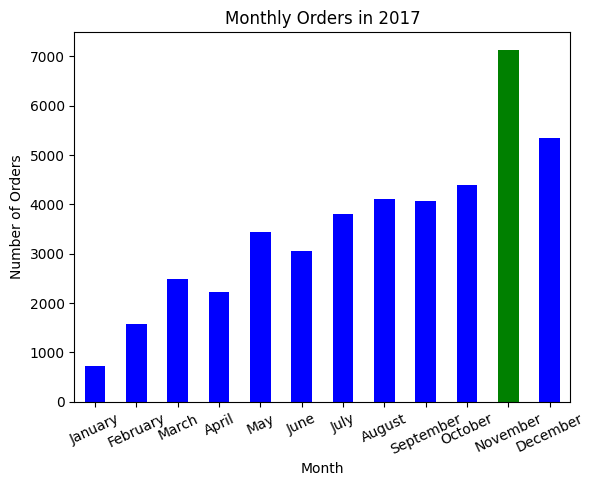


Jumlah terbanyak pada bulan November dengan jumlah product terjual : 7135


In [37]:
jumlah_terbanyak = monthly_order_2017.max()
bulan_terbanyak = monthly_order_2017.idxmax()
colors = ['blue' if month != bulan_terbanyak else 'green' for month in monthly_order_2017.index]
monthly_order_2017.plot(kind ="bar",color=colors )

plt.title('Monthly Orders in 2017')
plt.xlabel('Month')
plt.xticks(rotation=25)
plt.ylabel('Number of Orders')

plt.show()

print("\nJumlah terbanyak pada bulan {} dengan jumlah product terjual : {}".format(bulan_terbanyak,jumlah_terbanyak))

### Pertanyaan 2: Apa saja 10 kategori produk yang paling banyak terjual pada bulan juli tahun 2018?

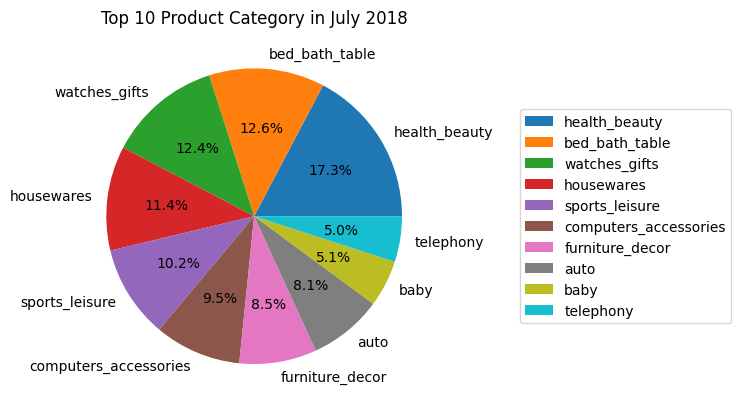

In [38]:
top_ten_product_category_july_2018.plot.pie(y='Number of Orders', labels=top_ten_product_category_july_2018.index, autopct='%1.1f%%', legend=False)
plt.title('Top 10 Product Category in July 2018')
plt.legend(top_ten_product_category_july_2018.index, loc='center left', bbox_to_anchor=(1.2, 0.5))

plt.ylabel('')
plt.show()

### Pertanyaan 3: Bagaimana perkembangan rata-rata tingkat kepuasan yang diberikan customer tiap tahun?

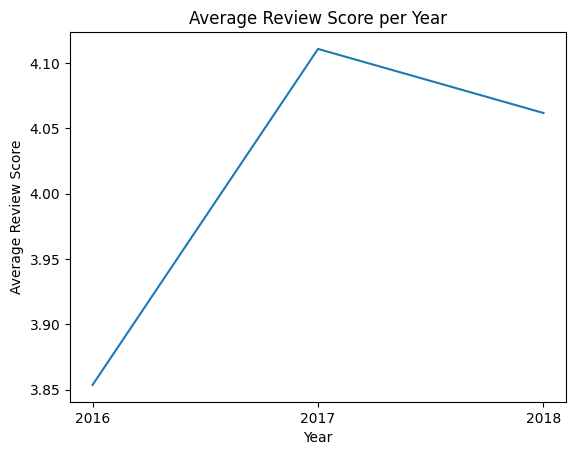

In [39]:
avg_review_per_year.plot()
plt.title('Average Review Score per Year')
plt.xlabel('Year')
plt.xticks(ticks=[2016, 2017, 2018], labels=['2016', '2017', '2018'])
plt.ylabel('Average Review Score')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Pada bulan apa mencapai penjualan tertinggi pada tahun 2017?

 Penjualan product terbanyak pada tahun 2017 adalah pada bulan november dengan jumlah product terjual : 7135

- Conclution pertanyaan 2 : Apa saja 10 kategori produk yang paling banyak terjual pada bulan juli tahun 2018?

 Top 10 kategori product yang paling banyak terjual pada bulan juli tahun 2018 :
1. health_beauty : 695
2. bed_bath_table : 508
3. watches_gifts	: 499
4. housewares	: 459
5. sports_leisure	: 409
6. computers_accessories	: 381
7. furniture_decor	: 340
8. auto	: 324
9. baby	: 205
10. telephony	: 201



- Conclution pertanyaan 3 : Bagaimana perkembangan rata-rata tingkat kepuasan yang diberikan customer tiap tahun?

 Perkembangan rata-rata tingkat kepuasan dari tahun :

 2016 = 3.85

 2017 = 4.11

 2018 = 4.06

 terlihat pada tahun 2016-2017 terjadi pengingkatan rata-rata kepuasan customer, dan pada tahun 2017-2018 terjadi sedikit penurunan rata-rata kepuasan customer